# **Linear regression 1D: Training Two Parameter**

**Objective**

* How to train the model and visualize the loss results.

* Make Some Data
* Create the Model and Cost Function (Total Loss)
* Train the Model

# Preparation

In [1]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class plot_error_surfaces is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch.

In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()








# Make Some Data

In [3]:
# Import PyTorch library

import torch

In [4]:
# Start with generating values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate.

# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

In [5]:
# Now, add some noise to the data:

# Add noise

Y = f + 0.1 * torch.randn(X.size())

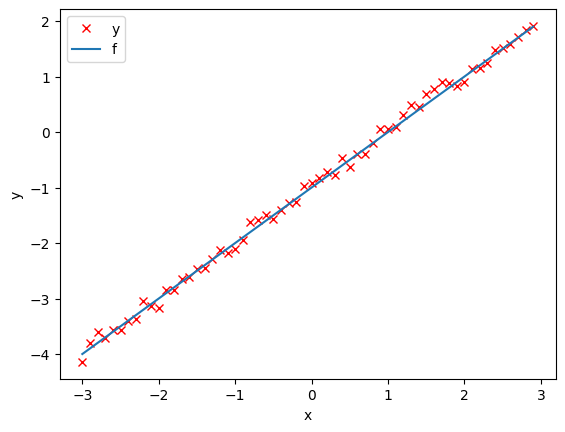

In [6]:
# Plot the line and Y with noise:

# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Create the Model and Cost Function (Total Loss)

In [7]:
# Define the forward function:

# Define the forward function

def forward(x):
    return w * x + b

In [8]:
# Define the cost or criterion function (MSE):

# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 640x480 with 0 Axes>

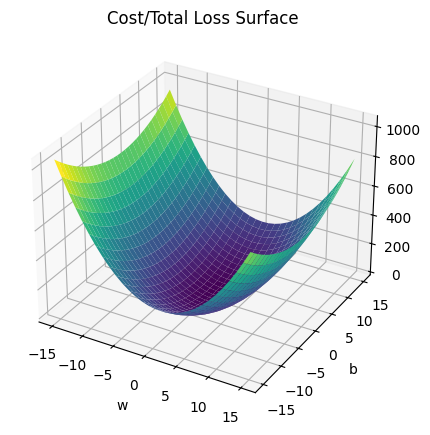

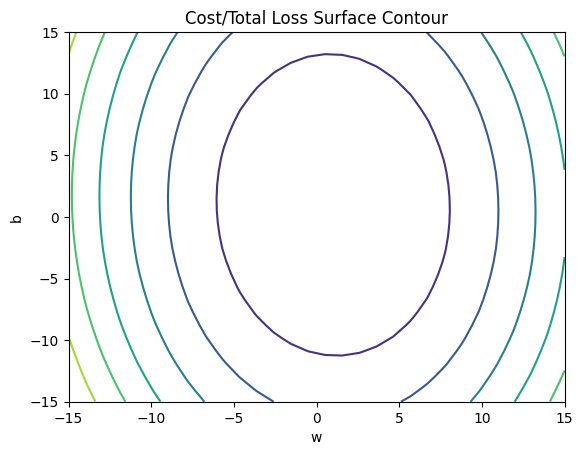

In [9]:
# Create a  plot_error_surfaces object to visualize the data space and the parameter space during training:

# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

# Train the Model

In [10]:
# Create model parameters w, b by setting the argument requires_grad to True because we must learn it using the data.

# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [11]:
# Set the learning rate to 0.1 and create an empty list LOSS for storing the loss for each iteration.

# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [12]:
# Define train_model function for train the model.

# The function for training the model

def train_model(iter):

    # Loop
    for epoch in range(iter):

        # make a prediction
        Yhat = forward(X)

        # calculate the loss
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()

        # store the loss in the list LOSS
        LOSS.append(loss)

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

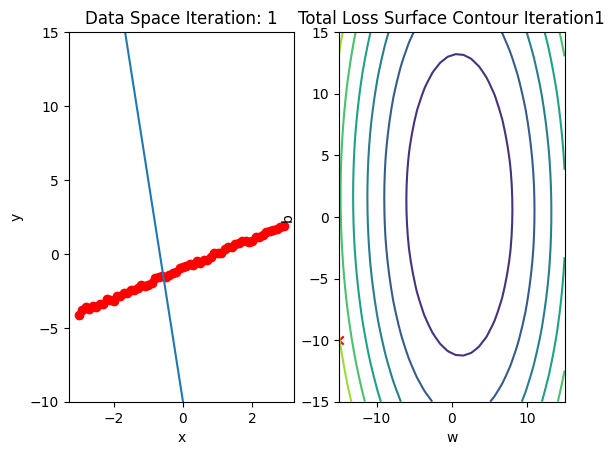

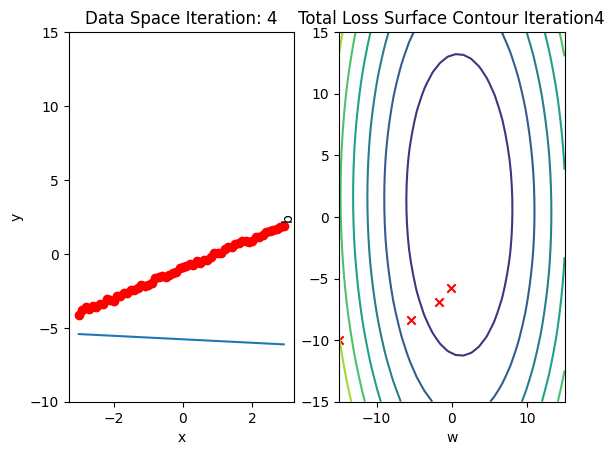

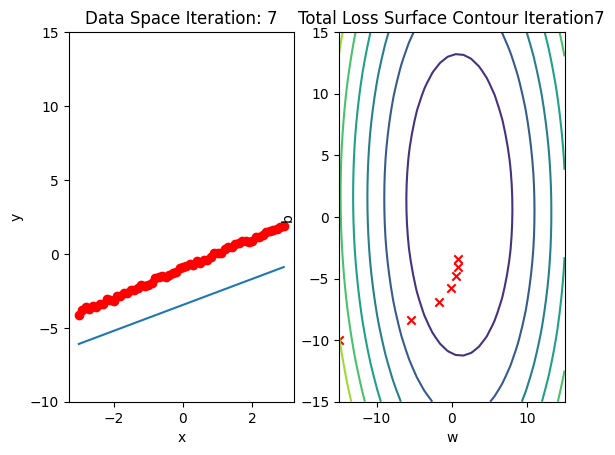

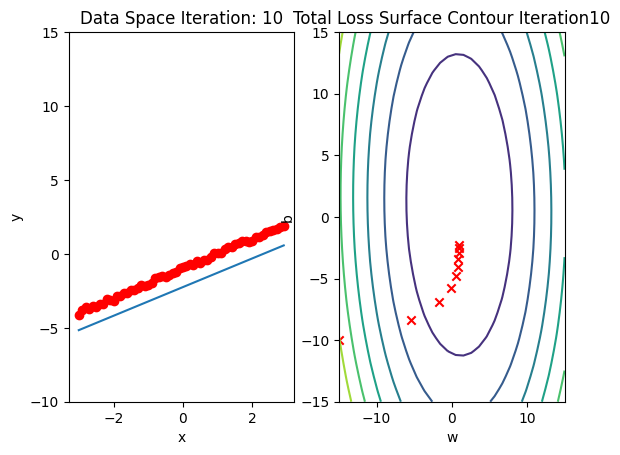

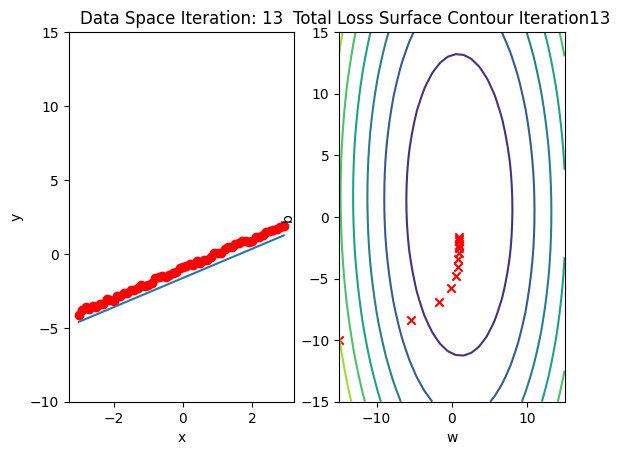

In [13]:
# Run 15 iterations of gradient descent: bug data space is 1 iteration ahead of parameter space

# Train the model with 15 iterations

train_model(15)

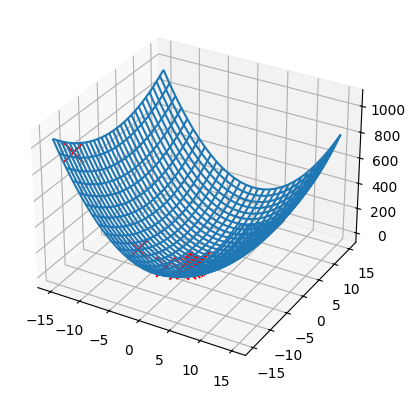

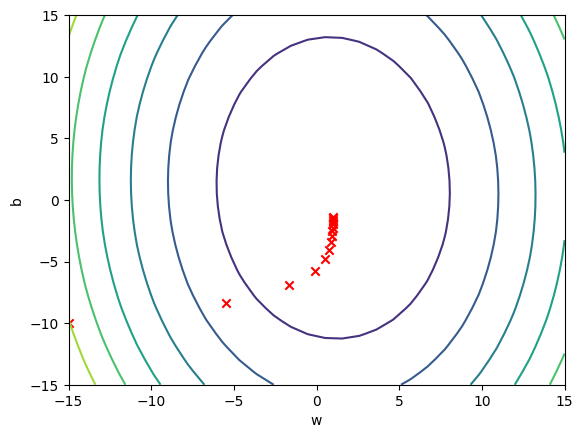

Text(38.347222222222214, 0.5, 'Cost')

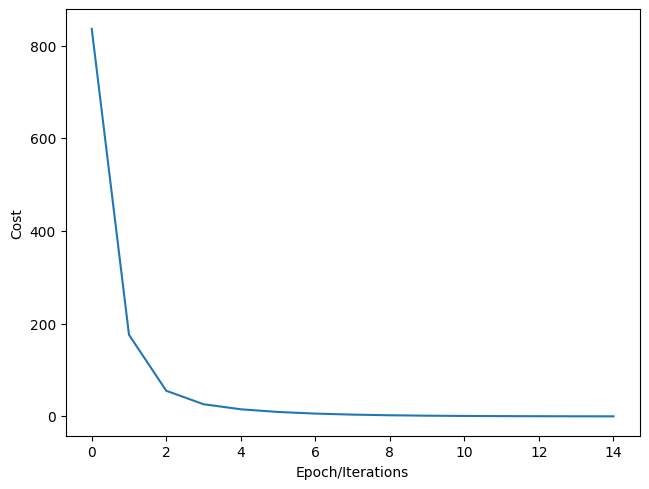

In [14]:
# Plot total loss/cost surface with loss values for different parameters in red:

# Plot out the Loss Result

get_surface.final_plot()
LOSS= [ loss.detach().numpy() for loss in LOSS]
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")